In [1]:
## Import all diferent libraries
import os, sys

if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('../')
    sys.path.insert(0, 'src/')

import numpy as np
import pandas as pd
import glob
import yaml
import pprint
from datetime import datetime
from scipy.stats import ttest_ind
import seaborn as sns
from matplotlib import pyplot as plt
import re


In [2]:
##gets access to file path and gets data

paths = yaml.load(open('../../../paths.yaml', 'r'), Loader=yaml.FullLoader)

DATA_FOLDER = paths['data'] + '2021-08-post-mortem-biologic-pc/'
FILE_GROUP_REGEX_LIST = ['*coin*nmc111*precondition*.mpt*']
## sorts every file that has coin and hppc in the folder. datafolder is a path to the folder 
file_paths = [sorted(glob.glob(f'{DATA_FOLDER}{f}')) for f in FILE_GROUP_REGEX_LIST]

file_paths

[['/Users/aweng/code/fast-formation/data/2021-08-post-mortem-biologic-pc/20210817_coin_nmc111_cell2_precondition_2_CA2.mpt',
  '/Users/aweng/code/fast-formation/data/2021-08-post-mortem-biologic-pc/20210825_coin_nmc111_cell2_precondition_3_CA2.mpt']]

In [3]:
def Quantity(df):
    cycles_num=np.unique(df['cycle number'])
    Time=[]
    Voltage=[]
    Current=[]
    #Resistance=[]
    Capacity_T=[]
    Capacity_C=[]
    for a in cycles_num:
        i=np.where(df['cycle number']==a)
        for d in i[0][1:-1]:
            if df.loc[d-1,'I/mA']<0:
                time1= df.loc[d-1, 'time/s']
                time2= df.loc[d, 'time/s']
                current_=abs(df.loc[d, 'I/mA'])
                Capacity_T.append(current_*(time2-time1)/3600) 
        Capacity_C.append(np.sum(Capacity_T))
        Capacity_T.clear    
    return Capacity_C

In [4]:
def load_data(file_name):
    
    num_header_lines = 106

    df = pd.read_csv(file_name, header=num_header_lines, sep='\t', encoding='ISO-8859-1')
    if df.columns[0]!='mode':
        df=pd.read_csv(file_name, header=num_header_lines-1 , sep='\t', encoding='ISO-8859-1')
    if df.columns[0]!='mode':
        df=pd.read_csv(file_name, header=num_header_lines-2 , sep='\t', encoding='ISO-8859-1')
    if df.columns[0]!='mode':
        df=pd.read_csv(file_name, header=num_header_lines-3 , sep='\t', encoding='ISO-8859-1')
    if df.columns[0]!='mode':
        df=pd.read_csv(file_name, header=num_header_lines-5 , sep='\t', encoding='ISO-8859-1')
        
    return df

In [5]:
df = load_data(file_paths[0][0])

In [6]:
df

,mode,ox/red,error,control changes,Ns changes,counter inc.,Ns,I Range,time/s,control/V/mA,...,Q discharge/mA.h,Q charge/mA.h,Capacity/mA.h,Efficiency/%,control/V,control/mA,cycle number,P/W,R/Ohm,Unnamed: 28
0,3,1,0,1,0,0,0,115,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,3,1,0,1,0,0,0,115,10.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,3,1,0,1,0,0,0,115,20.000001,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,3,1,0,1,0,0,0,115,30.000001,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,3,1,0,1,0,0,0,115,40.000002,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2573,3,0,0,0,0,1,6,115,86673.388176,0.0,...,1.695209,0.0,1.695209,0.0,0.0,0.0,2.0,0.0,0.0,NaN
2574,3,0,0,0,0,1,6,115,86683.388176,0.0,...,1.695209,0.0,1.695209,0.0,0.0,0.0,2.0,0.0,0.0,NaN
2575,3,0,0,0,0,1,6,115,86693.388177,0.0,...,1.695209,0.0,1.695209,0.0,0.0,0.0,2.0,0.0,0.0,NaN
2576,3,0,0,0,0,1,6,115,86693.622177,0.0,...,1.695209,0.0,1.695209,0.0,0.0,0.0,2.0,0.0,0.0,NaN


In [7]:
df.columns

Index(['mode', 'ox/red', 'error', 'control changes', 'Ns changes',
       'counter inc.', 'Ns', 'I Range', 'time/s', 'control/V/mA', 'Ecell/V',
       'I/mA', 'dq/mA.h', '(Q-Qo)/mA.h', 'Energy/W.h',
       'Q charge/discharge/mA.h', 'half cycle', 'Temperature/°C', 'x',
       'Q discharge/mA.h', 'Q charge/mA.h', 'Capacity/mA.h', 'Efficiency/%',
       'control/V', 'control/mA', 'cycle number', 'P/W', 'R/Ohm',
       'Unnamed: 28'],
      dtype='object')

Text(0.5, 0, 'Time (s)')

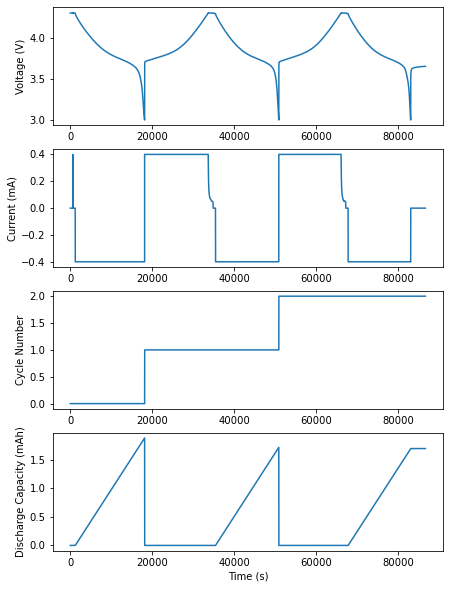

In [8]:
plt.figure(figsize=(7, 10))

plt.subplot(4, 1, 1)
plt.plot(df['time/s'], df['Ecell/V'])
plt.ylabel('Voltage (V)')

plt.subplot(4, 1, 2)
plt.plot(df['time/s'], df['I/mA'])
plt.ylabel('Current (mA)')

plt.subplot(4, 1, 3)
plt.plot(df['time/s'], df['cycle number'])
plt.ylabel('Cycle Number')

plt.subplot(4, 1, 4)
plt.plot(df['time/s'], df['Q discharge/mA.h'])
plt.ylabel('Discharge Capacity (mAh)')

plt.xlabel('Time (s)')

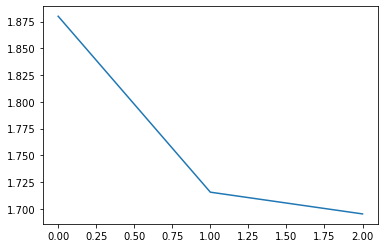

In [9]:
unique_cycle_numbers = np.unique(df['cycle number'])

capacity_vec_mah = []

for cycle_number in unique_cycle_numbers:
    
    current_df = df[df['cycle number'] == cycle_number]

    capacity_vec_mah.append(np.max(current_df['Q discharge/mA.h']))
    
plt.figure()
plt.plot(unique_cycle_numbers, capacity_vec_mah)

Index(['mode', 'ox/red', 'error', 'control changes', 'Ns changes',
       'counter inc.', 'Ns', 'I Range', 'time/s', 'control/V/mA', 'Ecell/V',
       'I/mA', 'dq/mA.h', '(Q-Qo)/mA.h', 'Energy/W.h',
       'Q charge/discharge/mA.h', 'half cycle', 'Temperature/°C', 'x',
       'Q discharge/mA.h', 'Q charge/mA.h', 'Capacity/mA.h', 'Efficiency/%',
       'control/V', 'control/mA', 'cycle number', 'P/W', 'R/Ohm',
       'Unnamed: 28'],
      dtype='object')
Index(['mode', 'ox/red', 'error', 'control changes', 'Ns changes',
       'counter inc.', 'Ns', 'I Range', 'time/s', 'control/V/mA', 'Ecell/V',
       'I/mA', 'dq/mA.h', '(Q-Qo)/mA.h', 'Energy/W.h',
       'Q charge/discharge/mA.h', 'half cycle', 'Temperature/°C', 'x',
       'Q discharge/mA.h', 'Q charge/mA.h', 'Capacity/mA.h', 'Efficiency/%',
       'control/V', 'control/mA', 'cycle number', 'P/W', 'R/Ohm',
       'Unnamed: 28'],
      dtype='object')


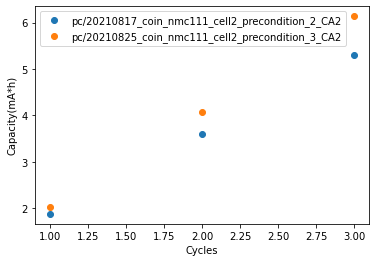

In [10]:
plt.figure()
plt.xlabel('Cycles')
plt.ylabel('Capacity(mA*h)')

for file1 in file_paths[0]:
        
    df = load_data(file1)
    
    print(df.columns)
        
    Capacity= Quantity(df)
    Cycles=range(len(Capacity)+1)
    plt.plot(Cycles[1:], Capacity, label=file1[67:-4],linestyle="",marker="o")
plt.legend()


##### 